In [59]:
pip install facenet-pytorch --no-binary :all:

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install insightface

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached protobuf-6.31.0-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
Using cached protobuf-6.31.0-cp39-abi3-macosx_10_9_universal2.whl (425 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.7 requires protobuf<4,>=3.11, but you have protobuf 6.31.0 which is incompatible.
tensorflow-macos 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow-macos 2.13.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 6.31.0 which is incompatible.
tensorflow-macos 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.
Not

In [61]:
pip install numpy==1.26.4

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install opencv-python==4.8.1.78

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install protobuf==3.20.3 --force-reinstall

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.0
    Uninstalling protobuf-6.31.0:
      Successfully uninstalled protobuf-6.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-macos 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow-macos 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install transformers torchvision torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [65]:
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from deepface import DeepFace


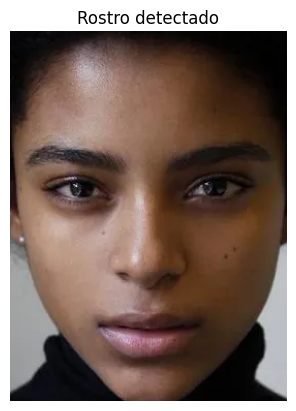

Valor L detectado: 115
Tono de piel clasificado: clear


In [66]:
#### Detectar color de piel ####
# Inicializar detector
mtcnn = MTCNN(keep_all=False, device='cpu')  # usar 'cuda' si tenés GPU

# Cargar imagen
image_path = '../data/6_image_women_black.png'
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(image_rgb)

# Detectar rostro y obtener bounding box
box = mtcnn.detect(image_pil)[0]

if box is not None and box[0] is not None:
    x1, y1, x2, y2 = map(int, box[0])  # Primera cara detectada
    face_crop = image_rgb[y1:y2, x1:x2]

    # Mostrar recorte
    plt.imshow(face_crop)
    plt.axis('off')
    plt.title("Rostro detectado")
    plt.show()
# else:
    # print("No se detectó rostro.")

def extraer_color_tez(face_crop, k=1):
    """
    Detecta el color predominante de piel y devuelve LAB + RGB.
    """
    face_lab = cv2.cvtColor(face_crop, cv2.COLOR_RGB2LAB)
    h, w, _ = face_lab.shape
    region = face_lab[h//4:h//2 + h//8, w//4:3*w//4]

    pixels = region.reshape(-1, 3)
    filtered_pixels = np.array([p for p in pixels if p[0] > 50])

    if len(filtered_pixels) == 0:
        print("⚠️ No se encontraron píxeles válidos.")
        return None, None

    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(filtered_pixels)
    lab_color = kmeans.cluster_centers_[0].astype(int)

    # Convertir a RGB
    dummy_img = np.zeros((1, 1, 3), dtype=np.uint8)
    dummy_img[0, 0, :] = lab_color
    rgb_color = cv2.cvtColor(dummy_img, cv2.COLOR_LAB2RGB)[0, 0, :]

    return lab_color, rgb_color

lab_color, rgb_color = extraer_color_tez(face_crop)

def clasificar_tono_piel(lab_color):
    l, _, _ = lab_color
    print(f"Valor L detectado: {l}")
    if l > 75:
        return "clear"
    elif 50 <= l <= 75:
        return "medium"
    else:
        return "dark"

# Uso
skin_tone = clasificar_tono_piel(lab_color)
print(f"Tono de piel clasificado: {skin_tone}")


In [67]:
# Convertir face_crop a formato BGR para OpenCV si es RGB
face_bgr = cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR)

# Detectar género sobre el rostro ya recortado
result = DeepFace.analyze(img_path=face_bgr, actions=['gender'], detector_backend='mtcnn', enforce_detection=True)

# Obtener género
gender = result[0]['dominant_gender']
print(f"Género detectado: {gender}")

1/1 [==============================] - 0s 9ms/step
Género detectado: Woman


In [68]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import torch
import numpy as np
from sklearn.cluster import KMeans
import cv2

def obtener_color_cabello(image_path, prompt="hair", k=2):
    # Cargar imagen
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)

    # Cargar modelo y procesador
    processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
    model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

    # Preparar inputs
    inputs = processor(text=prompt, images=image, return_tensors="pt")

    # Inferencia
    with torch.no_grad():
        outputs = model(**inputs)

    # Obtener máscara
    pred_mask = torch.sigmoid(outputs.logits)[0].squeeze()
    binary_mask = (pred_mask > 0.5).cpu().numpy().astype("uint8")

    # Redimensionar máscara al tamaño original
    resized_mask = cv2.resize(binary_mask, (image_np.shape[1], image_np.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Aplicar la máscara
    hair_pixels = image_np[resized_mask == 1]


    if len(hair_pixels) == 0:
        return "unknown"

    # Calcular color dominante
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(hair_pixels)
    dominant_rgb = kmeans.cluster_centers_[0].astype(int)

    return clasificar_color_cabello(dominant_rgb)

def clasificar_color_cabello(rgb):
    r, g, b = rgb
    if r < 60 and g < 60 and b < 60:
        return "black"
    elif r > 180 and g > 180 and b < 150:
        return "blonde"
    elif r > 100 and r > b and g > 50:
        return "light_brown"
    elif r > 60 and r < 150 and b < 100:
        return "dark_brown"
    elif r > 150 and g < 100 and b < 100:
        return "red"
    else:
        return "unknown"
# Prueba
image_path = "../data/6_image_women_black.png"
hair_color = obtener_color_cabello(image_path)
print(f"Color de cabello detectado: {hair_color}")


Color de cabello detectado: black


In [69]:
import json

def generar_json_atributos(skin_tone, hair_color, gender):
    """
    Arma un JSON con los atributos detectados del cliente.

    Parámetros:
    - tono_piel (str): "clear", "medium", "dark"
    - color_cabello (str): e.g. "dark_brown", "blonde", "black"
    - genero (str): "female" o "male"

    Retorna:
    - str: JSON formateado
    """
    atributos = {
        "skin_tone": skin_tone,
        "hair_color": hair_color,
        "gender": gender.lower()
    }

    return json.dumps(atributos, indent=2)

json_resultado = generar_json_atributos(skin_tone, hair_color, gender)
print(json_resultado)


{
  "skin_tone": "clear",
  "hair_color": "black",
  "gender": "woman"
}
